<a href="https://colab.research.google.com/github/shahruroji/shahruroji/blob/main/data_mining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install sastrawi unidecode textblob

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.5/235.5 kB 9.5 MB/s eta 0:00:00


In [2]:
import warnings; warnings.simplefilter('ignore')
import nltk

try:
    import google.colab; IN_COLAB = True
    !wget https://raw.githubusercontent.com/taudataanalytics/taudata-Academy/master/taudataNlpTm.py
    !mkdir data
    !wget -P data/ https://raw.githubusercontent.com/taudataanalytics/taudata-Academy/master/data/slang.txt
    !wget -P data/ https://raw.githubusercontent.com/taudataanalytics/taudata-Academy/master/data/stopwords_id.txt
    !wget -P data/ https://raw.githubusercontent.com/taudataanalytics/taudata-Academy/master/data/stopwords_en.txt
    !wget -P data/ https://raw.githubusercontent.com/taudataanalytics/taudata-Academy/master/data/kata_dasar.txt
    !wget -P data/ https://raw.githubusercontent.com/taudataanalytics/taudata-Academy/master/data/wn-ind-def.tab
    !wget -P data/ https://raw.githubusercontent.com/taudataanalytics/taudata-Academy/master/data/wn-msa-all.tab
    !wget -P data/ https://raw.githubusercontent.com/taudataanalytics/taudata-Academy/master/data/ind_SA.csv
    !wget -P data/ https://raw.githubusercontent.com/taudataanalytics/taudata-Academy/master/data/all_indo_man_tag_corpus_model.crf.tagger

    !pip install spacy python-crfsuite unidecode textblob sastrawi
    !python -m spacy download xx
    !python -m spacy download en_core_web_sm

    nltk.download('popular')
except:
    IN_COLAB = False
    print("Running the code locally, please make sure all Python module versions agree with Colab environment and all data/datasets downloaded")

--2024-05-30 14:15:05--  https://raw.githubusercontent.com/taudataanalytics/taudata-Academy/master/taudataNlpTm.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 14001 (14K) [text/plain]
Saving to: ‘taudataNlpTm.py’

taudataNlpTm.py     100%[===================>]  13.67K  --.-KB/s    in 0s      

2024-05-30 14:15:05 (74.2 MB/s) - ‘taudataNlpTm.py’ saved [14001/14001]

--2024-05-30 14:15:05--  https://raw.githubusercontent.com/taudataanalytics/taudata-Academy/master/data/slang.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gazetteers.zip.
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/genesis.zip.
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gutenberg.zip.
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/inaugural.zip.
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/movie_reviews.zip.
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/names.zip.
[nltk_data]    | Downloading package shakespeare to /root/nltk_data...
[nlt

In [3]:

import tweepy
import time
import numpy as np, matplotlib.pyplot as plt, pandas as pd, seaborn as sns
import re
from tweepy import OAuthHandler
from textblob import TextBlob
from wordcloud import WordCloud
import warnings; warnings.simplefilter('ignore')
import itertools, re, nltk
import time
from matplotlib.colors import ListedColormap
from textblob import TextBlob
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from unidecode import unidecode
from nltk.tag import CRFTagger
from html import unescape
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from tqdm import tqdm
import nest_asyncio
import pandas as pd
from sklearn.model_selection import train_test_split

nltk.download('punkt')

factory = StopWordRemoverFactory()
stemmer = StemmerFactory().create_stemmer()
sns.set(style="ticks", color_codes=True)
random_state = 170
'Done'

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


'Done'

In [4]:
# Loading Data
import warnings; warnings.simplefilter('ignore')
import pandas as pd

fData = 'data/Data-Hoax-Mafindo.csv'
try:
    data = pd.read_csv(fData) # read data local storage
except:
    !mkdir data
    !wget -P data/ https://raw.githubusercontent.com/taudataanalytics/taudata-Academy/master/data/Data-Hoax-Mafindo.csv # read data dari url
    data = pd.read_csv(fData)

data.head(20) # menampilkan 20 data pertama

mkdir: cannot create directory ‘data’: File exists
--2024-05-30 14:21:07--  https://raw.githubusercontent.com/taudataanalytics/taudata-Academy/master/data/Data-Hoax-Mafindo.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1279335 (1.2M) [text/plain]
Saving to: ‘data/Data-Hoax-Mafindo.csv’

Data-Hoax-Mafindo.c 100%[===================>]   1.22M  --.-KB/s    in 0.01s   

2024-05-30 14:21:07 (121 MB/s) - ‘data/Data-Hoax-Mafindo.csv’ saved [1279335/1279335]



,ID,label,tanggal,judul,narasi,nama file gambar
0,71,1,17-Aug-20,Pemakaian Masker Menyebabkan Penyakit Legionna...,A caller to a radio talk show recently shared ...,71.jpg
1,461,1,17-Jul-20,Instruksi Gubernur Jateng tentang penilangan ...,Yth.Seluruh Anggota Grup Sesuai Instruksi Gube...,461.png
2,495,1,13-Jul-20,Foto Jim Rohn: Jokowi adalah presiden terbaik ...,Jokowi adalah presiden terbaik dlm sejarah ban...,495.png
3,550,1,8-Jul-20,"ini bukan politik, tapi kenyataan Pak Jokowi b...","Maaf Mas2 dan Mbak2, ini bukan politik, tapi k...",550.png
4,681,1,24-Jun-20,Foto Kadrun kalo lihat foto ini panas dingin,Kadrun kalo lihat foto ini panas dingin . .,681.jpg
5,736,1,17-Jun-20,event promo smartphone JNE 2020 spesial di bul...,"selamat siang teman teman fb ku semuanya🤩,cuma...",736.png
6,1161,1,5-May-20,MEREKA SUDAH MEMPERSIAPKAN DIRI DENGAN BAIK UN...,LIHATLAH MEREKA SUDAH MEMPERSIAPKAN DIRI DENGA...,1161.png
7,1597,1,24-Mar-20,Foto Presiden Italia menangis karena tak cukup...,Italia punya fasilitas perawatan kesehatan ter...,1597.png
8,2098,1,9-Jan-20,"Kapolres Timor Tengah Utara , Nusa Tenggara Ti...",Polisi goblok. Bukanya cpet” d tolongin malah ...,2098.jpg
9,2226,1,24-Dec-19,Video Polisi china telah menganiaya wanita uig...,Polisi china telah menganiaya wanita uighur le...,2226.png


from matplotlib import pyplot as plt
_df_0['ID'].plot(kind='hist', bins=20, title='ID')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['label'].plot(kind='hist', bins=20, title='label')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2.plot(kind='scatter', x='ID', y='label', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['ID']
  ys = series['label']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_3.sort_values('ID', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('ID')
_ = plt.ylabel('label')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['ID']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'ID'}, axis=1)
              .sort_values('ID', ascending=True))
  xs = counted['ID']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_4.sort_values('ID', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('ID')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_5['ID'].plot(kind='line', figsize=(8, 4), title='ID')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_6['label'].plot(kind='line', figsize=(8, 4), title='label')
plt.gca().spines[['top', 'right']].set_visible(False)

In [5]:
# Cek missing value
data.isna().sum()

ID                  0
label               0
tanggal             0
judul               0
narasi              0
nama file gambar    0
dtype: int64

In [6]:
data.duplicated(subset = 'narasi').sum() #cek data yang terduplikat dari kolom narasi

26

In [7]:
data[data.duplicated(subset = 'narasi')] #menampilkan data duplikat untuk kolom 'narasi'

,ID,label,tanggal,judul,narasi,nama file gambar
427,98616,1,29-Jul-20,Antena 5G di dalam masker Anda,5G antenna inside of your masks,98616.png
497,115208,1,11-Jul-20,Foto All Jakarta Water Park,PERKENALKAN: ALL JAKARTA WATER PARK,115208.png
812,188319,0,28-Nov-15,Jokowi Lebih Memilih Helikopter Buatan Luar Ne...,"INSTING MAKELAR\n \n AKU Awalnya kaget, membac...",188319.png
892,204936,1,11-Aug-20,Corona is a hoax,CORONA IS A HOAX,204936.jpg
1344,312152,1,2-Jun-20,Foto Sekarang malesiya sapu habis penduduk asi...,Perhatian perhatian Sekarang malesiya makin da...,312152.jpg
1632,372224,1,18-Apr-19,Data di Mabes TNI berdasarkan Formulir C1,Cek tangkapan layar.,372224.png
1776,405308,1,23-Feb-19,Foto Suntingan Jokowi,Cek tangkapan layar.,405308.png
1777,405325,1,19-Feb-19,Terdapat obat bius di daun teh Tiek Kwan Im,Cek tangkapan layar,405325.png
2103,492286,1,14-Jun-20,"Hantu Nge-GYM di Taman Jhansi, India Karena T...",Weird things happening at deserted Japani park...,492286.jpg
2501,583363,1,14-Mar-20,"Queensland, Australia: Actor Tom Hanks has die...",A Queensland Health spokeswoman said the actor...,583363.png


In [8]:
data.shape # mengecek dimensi data (baris, kolom)

(4701, 6)

In [9]:
data.duplicated().sum()

0

In [10]:
# Drop data duplikat berdasarkan judul
data.drop_duplicates(subset='judul', keep='first', inplace=True, ignore_index=False)
data.shape

(4687, 6)

In [11]:
# Ambil kolom narasi untuk dipisahkan
data_narasi = data[['narasi']]
data_narasi.at[0,'narasi']

'A caller to a radio talk show recently shared that his wife was hospitalized n told she had COVID n only a couple of days left to live . A doctor friend suggested she be tested for legionnaires disease because she wore the same mask every day all day long . Turns out it WAS legionnaires disease from the moisture n bacteria in her mask . She was given antibiotics n within two days was better . WHAT IF these ‘spikes’ in COVID are really something else due to ‘mask induced infections’ .??🤔🤔🤔'

In [ ]:
def clean_text(txt): #fungsi untuk membersihkan data
    text = unidecode(unescape(txt.lower().strip())) #Remove URL
    urlPattern = re.compile(r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+')
    text = re.sub(urlPattern,' ', text) # Remove links
    text = re.sub(r'[^\w]', ' ', text) # Remove Symbol, keep "_"
    text = stemmer.stem(text) #stemming
    return text

In [32]:
data_narasi['clean_narasi'] = '' # initiate kolom kosong untuk diisi kolom narasi yang sudah dibersihkan
data_narasi['clean_narasi'] = data_narasi['narasi'].apply(clean_text) #jalankan fungsi pada data
data_narasi.head()

KeyboardInterrupt: 

In [17]:
# Keluarkan dictionary kata-kata slang dari modul taudata
df=open('data/slang.txt',"r",encoding="utf-8", errors='replace')
slangS = df.readlines(); df.close()
slangS = [t.strip('\n').strip() for t in slangS] # hapus enter dari setiap elemen dalam list slangS

print(slangS[:5]) # print 5 elemen pertama dari list slangS

# pisahkan berdasarkan ':'
slangS = [t.split(":") for t in slangS]
slangS = [[k.strip(), v.strip()] for k,v in slangS] # hapus spasi dari key dan value dalam setiap pasangan kata-kata
print(slangS[:5])
slangS = {k:v for k,v in slangS} # buat dictionary dari pasangan kata dengan key dan value

['& : dan', '1pun : satupun', '7an : tujuan', '@ : di', 'Dr : dokter']
[['&', 'dan'], ['1pun', 'satupun'], ['7an', 'tujuan'], ['@', 'di'], ['Dr', 'dokter']]


In [15]:
def slangfreetext(text): #fungsi untuk mengubah singkatan / slank words menjadi kata yang dimaksud
  Tokens = TextBlob(text).words # Tokenisasi
  for i,t in enumerate(Tokens):
      if t in slangS.keys():
          Tokens[i] = slangS[t]    # ganti kata dalam token dengan kata dictionary slangS
  docx = ' '.join([t for t in Tokens]) # gabung kembali token menjadi teks
  return docx

In [16]:
data_narasi['clean_narasi'] = data_narasi['clean_narasi'].apply(slangfreetext) #jalankan fungsi pada data
data_narasi.head()

,narasi,clean_narasi
0,A caller to a radio talk show recently shared ...,
1,Yth.Seluruh Anggota Grup Sesuai Instruksi Gube...,
2,Jokowi adalah presiden terbaik dlm sejarah ban...,
3,"Maaf Mas2 dan Mbak2, ini bukan politik, tapi k...",
4,Kadrun kalo lihat foto ini panas dingin . .,


from matplotlib import pyplot as plt
import seaborn as sns
_df_7.groupby('narasi').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [18]:
# Loading Stopwords
# Stopwords bahasa Indonesia
Sastrawi_StopWords_id = factory.get_stop_words()

print(Sastrawi_StopWords_id)
print(len(Sastrawi_StopWords_id))

Sastrawi_StopWords_id = set(Sastrawi_StopWords_id)

['yang', 'untuk', 'pada', 'ke', 'para', 'namun', 'menurut', 'antara', 'dia', 'dua', 'ia', 'seperti', 'jika', 'jika', 'sehingga', 'kembali', 'dan', 'tidak', 'ini', 'karena', 'kepada', 'oleh', 'saat', 'harus', 'sementara', 'setelah', 'belum', 'kami', 'sekitar', 'bagi', 'serta', 'di', 'dari', 'telah', 'sebagai', 'masih', 'hal', 'ketika', 'adalah', 'itu', 'dalam', 'bisa', 'bahwa', 'atau', 'hanya', 'kita', 'dengan', 'akan', 'juga', 'ada', 'mereka', 'sudah', 'saya', 'terhadap', 'secara', 'agar', 'lain', 'anda', 'begitu', 'mengapa', 'kenapa', 'yaitu', 'yakni', 'daripada', 'itulah', 'lagi', 'maka', 'tentang', 'demi', 'dimana', 'kemana', 'pula', 'sambil', 'sebelum', 'sesudah', 'supaya', 'guna', 'kah', 'pun', 'sampai', 'sedangkan', 'selagi', 'sementara', 'tetapi', 'apakah', 'kecuali', 'sebab', 'selain', 'seolah', 'seraya', 'seterusnya', 'tanpa', 'agak', 'boleh', 'dapat', 'dsb', 'dst', 'dll', 'dahulu', 'dulunya', 'anu', 'demikian', 'tapi', 'ingin', 'juga', 'nggak', 'mari', 'nanti', 'melainkan', '

In [19]:
# Stopwords Bahasa Inggris
import nltk
nltk.download('stopwords') # mendownload class stopwords
from nltk.corpus import stopwords

print(stopwords.words('english'))
StopWords_en = set(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [20]:
# Stopwords tambahan berdasarkan pengamatan pada data
MoreStopWord = ["tidak", "jadi", "kamu", "sudah", "banget", "lihat", "sama", "berapa","buat","jadi","kalau","kali","habis","saja","apa","ini","akhir","sama","baik","banyak","juga","lagi",'yang',
                    'yg', 'gue', 'gw', 'gua', 'aku', 'untuk', 'utk', 'pada', 'sedang', 'ke', 'para', 'namun', 'menurut', 'antara', 'dia', 'dua', 'ia', 'seperti', 'jika','sehingga', 'kembali',
                    'dan', 'ini', 'karena', 'kepada', 'oleh', 'saat', 'harus', 'sementara', 'setelah', 'kami', 'sekitar', 'bagi', 'serta', 'di', 'dari', 'telah', 'sebagai', 'masih', 'hal',
                    'ketika', 'adalah', 'itu', 'dalam', 'bahwa', 'atau', 'hanya', 'kita', 'dengan', 'akan', 'juga', 'mereka', 'sudah', 'saya', 'terhadap', 'secara', 'agar', 'lain', 'anda',
                    'begitu', 'mengapa', 'kenapa', 'yaitu', 'yakni', 'daripada', 'itulah', 'lagi', 'maka', 'tentang', 'demi', 'dimana', 'kemana', 'pula', 'sambil', 'sebelum', 'sesudah', 'supaya',
                    'guna', 'kah', 'pun', 'sampai', 'sedangkan', 'selagi', 'sementara', 'tetapi', 'apakah', 'kecuali', 'sebab', 'selain', 'seolah', 'seraya', 'seterusnya', 'tanpa', 'boleh', 'dapat',
                    'dsb', 'dst', 'dll', 'dahulu', 'dulunya', 'anu', 'demikian', 'tapi', 'ingin', 'juga', 'nggak', 'mari', 'nanti', 'melainkan', 'oh', 'seharusnya', 'sebetulnya', 'setiap', 'setidaknya',
                    'sesuatu', 'pasti', 'saja', 'toh', 'ya', 'walau', 'tolong', 'tentu', 'apalagi', 'bagaimanapun', 'oalah', 'hoalah', 'pildun', 'di', 'ini', 'saya', 'kamu', 'dan', 'karena',
                    'saja', 'siapa', 'juga', 'kalau', 'dengan', 'dia', 'dari', 'sudah', 'masih', 'sampai', 'nya', 'akan', 'sih', 'pa', 'https', 'dan', 'ini', 'yang', 'banget', 't', 'banget',
                    'sudah', 'sama', 'nah', 'lah', 'itu', 'yang', 'pas','yah', 'ngga', 'nggak',"main","mau","lebih","kemarin","cuma","sekarang","dulu", 'bukan','dunia',
                    "tahu",'bakal','baru','orang','kayak','deh','mah','bang','jangan','sayang','bisa','doang','semua','jam','hari','memang','tadi','bahkan','tiap','lalu','terus','bagaimana',
                    'hari','biar','kok','wkwkwk','gitu','gara','emang','gara2','bikin','padahal','benar','orang','hari','sebut','the','iya']
Sastrawi_StopWords_id.update(MoreStopWord) # menambahkan list stopwords dengan list custom tambahan yang ada dalam list MoreStopWord
print(Sastrawi_StopWords_id)
print(len(Sastrawi_StopWords_id))

{'anu', 'sekitar', 'kah', 'ingin', 'hal', 'lihat', 'pildun', 'pun', 'nya', 'lagi', 'demi', 'di', 'dua', 'dimana', 'kecuali', 'seolah', 'pa', 'setiap', 'apa', 'orang', 'kamu', 'doang', 'padahal', 'kok', 'tidak', 'melainkan', 'saya', 'adalah', 'bagaimanapun', 'nah', 'namun', 'siapa', 'karena', 'kenapa', 'tahu', 'daripada', 'emang', 'ngga', 'kayak', 'dulunya', 'kami', 'atau', 'gitu', 'yaitu', 'seterusnya', 'deh', 'terus', 'dari', 'sedang', 'ketika', 'yah', 'harus', 'dapat', 'seraya', 'jadi', 'sayang', 'biar', 'saja', 'sebetulnya', 'bang', 'jika', 'agak', 'selain', 'sama', 't', 'bagaimana', 'kalau', 'wkwkwk', 'the', 'demikian', 'jam', 'main', 'ini', 'masih', 'https', 'akhir', 'dia', 'hari', 'gua', 'gara2', 'kepada', 'begitu', 'terhadap', 'secara', 'untuk', 'bagi', 'pada', 'itulah', 'sebut', 'kali', 'hoalah', 'sesudah', 'pasti', 'tentu', 'telah', 'setelah', 'sedangkan', 'berapa', 'sih', 'mari', 'seperti', 'oleh', 'lain', 'sebab', 'mau', 'sementara', 'kemarin', 'ada', 'yakni', 'yang', 'walau

In [22]:
def stopwords(text): #fungsi untuk merove stopwords dari data
  Tokens = TextBlob(text).words # tokenisasi
  docx = ' '.join([t for t in Tokens if str(t) not in Sastrawi_StopWords_id and StopWords_en and len(t)>2]) # Stopwords filtering untuk Stopword bahasa Indonesia dan Inggris serta kata-kata yang panjangnya kurang sama dengan 2
  return docx

In [23]:
data_narasi['clean_narasi'] = data_narasi['clean_narasi'].apply(stopwords) #jalankan fungsi pada data
data_narasi.head() #diperoleh data yang sudah rapih setelah dilakukan preprocessing

,narasi,clean_narasi
0,A caller to a radio talk show recently shared ...,
1,Yth.Seluruh Anggota Grup Sesuai Instruksi Gube...,
2,Jokowi adalah presiden terbaik dlm sejarah ban...,
3,"Maaf Mas2 dan Mbak2, ini bukan politik, tapi k...",
4,Kadrun kalo lihat foto ini panas dingin . .,


from matplotlib import pyplot as plt
import seaborn as sns
_df_8.groupby('narasi').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [24]:
# from google.colab import files

#untuk narasi yang sudah dibersihkan saja, data sudah disimpan di github
# data_narasi['clean_narasi'].to_csv('cleaned_narasi.txt', encoding = 'utf-8', index=False, header=False)
# files.download('cleaned_narasi.txt')

In [33]:
# Ambil data dari kolom narasi yang telah dibersihkan yang sudah tersedia di github
data_narasi = pd.read_csv("https://raw.githubusercontent.com/Aurelio-Naufal/Case-Study-Data-Mining-Aplikasi-Model-Klasifikasi-Kelompok-8/main/cleaned_narasi.txt", header=None, encoding='utf8')
data_narasi.head()

,0
0,caller radio talk show recently shared that hi...
1,yth seluruh anggota grup sesuai instruksi gube...
2,jokowi presiden sejarah bangsa indonesia jim r...
3,maaf mas2 mbak2 politik nyata pak jokowi hasil...
4,kadrun foto panas dingin


In [34]:
data_narasi.shape #mengecek dimensi data narasi (baris, kolom)

(4687, 1)

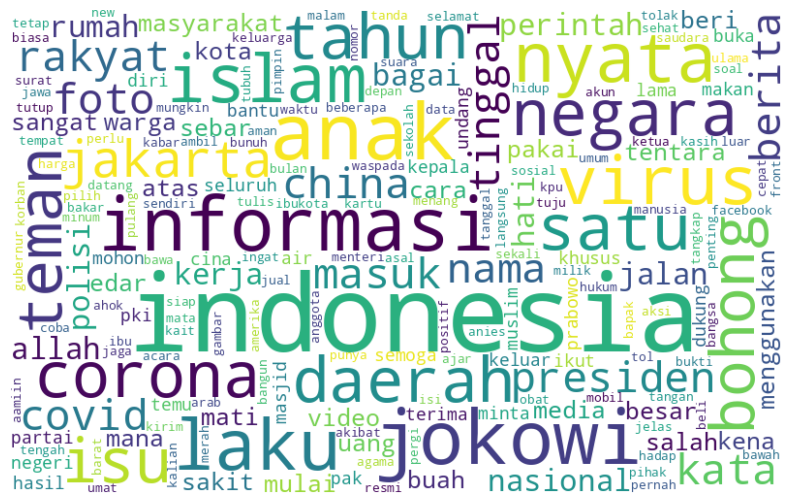

In [35]:
# membuat wordcloud dari tweet
all_words = ' '.join(map(str,[text for text in data_narasi[0]]))
wordcloud = WordCloud(collocations = False, background_color='white', width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [36]:
# menggabungkan data untuk visualisasi hasil labeling
df_label = pd.concat([data_narasi, data['label']], axis=1)
df_label

,0,label
0,caller radio talk show recently shared that hi...,1.0
1,yth seluruh anggota grup sesuai instruksi gube...,1.0
2,jokowi presiden sejarah bangsa indonesia jim r...,1.0
3,maaf mas2 mbak2 politik nyata pak jokowi hasil...,1.0
4,kadrun foto panas dingin,1.0
...,...,...
4696,NaN,0.0
4697,NaN,1.0
4698,NaN,1.0
4699,NaN,1.0


from matplotlib import pyplot as plt
df_label['label'].plot(kind='hist', bins=20, title='label')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df_label['label'].plot(kind='line', figsize=(8, 4), title='label')
plt.gca().spines[['top', 'right']].set_visible(False)

In [38]:
# Dataframe untuk masing-masing data hoax dan bukan hoax
df_label_hoax = df_label[0][df_label['label']==1] # Data hasil labeling dengan data hoax
df_label_nohoax = df_label[0][df_label['label']==0] # Data hasil labeling dengan bukan hoax

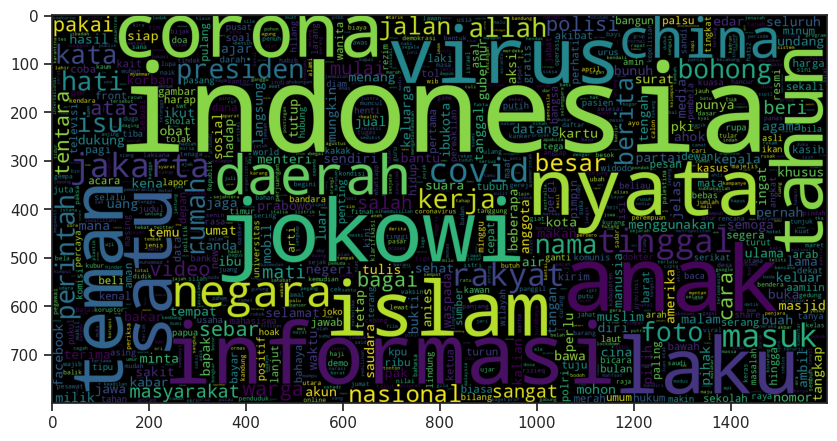

In [39]:
# word cloud untuk berita yang mengandung hoax
plt.figure(figsize = (10,6))
wc1 = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(",".join([str(i) for i in df_label_hoax]))
plt.imshow(wc1)

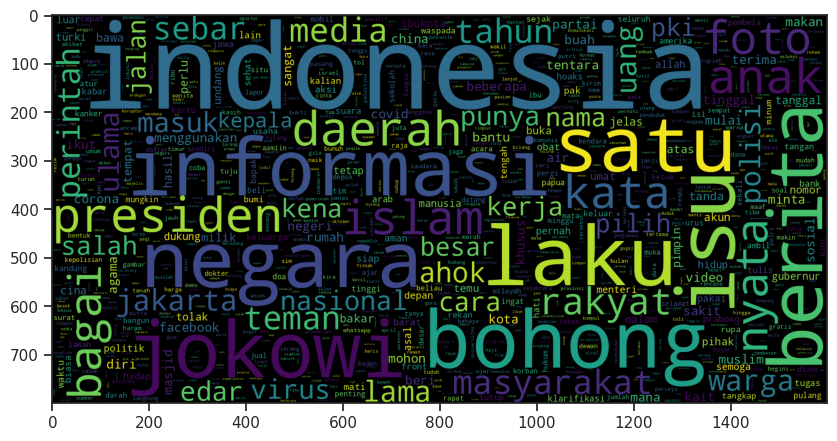

In [40]:
# word cloud untuk berita yang tidak mengandung hoax
plt.figure(figsize = (10,6))
wc1 = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(",".join([str(i) for i in df_label_nohoax]))
plt.imshow(wc1)

In [41]:
# Klasifikasi
import warnings; warnings.simplefilter('ignore')
import pandas as pd, matplotlib.pyplot as plt
import time, numpy as np, seaborn as sns
from sklearn import  tree
from sklearn.linear_model import LogisticRegression
from sklearn import neighbors
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
#from dtreeviz.trees import *
#import graphviz
from sklearn import svm, preprocessing
from sklearn.gaussian_process.kernels import RBF
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score
sns.set(style="ticks", color_codes=True)
"Done"

'Done'

In [42]:
# Mengambil kolom label dari data asli
data_label = data['label']
data_label.values

array([1, 1, 1, ..., 1, 1, 1])

In [44]:
# merubah data ke bentuk yang dapat dimodelkan
x = data_narasi[0].fillna(' ')
y = data_label.values

In [45]:
# VSM
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(lowercase = True, stop_words = 'english', smooth_idf = True, sublinear_tf = True,
                                   ngram_range = (1,2), max_df = 0.90, min_df = 2)

In [46]:
from sklearn.model_selection import train_test_split
seed = 99

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=seed)
x_train = tfidf_vectorizer.fit_transform(x_train)# "Fit_Transform"
x_test = tfidf_vectorizer.transform(x_test) # "Transform"

print(x_train.shape, x_test.shape)

(3280, 8176) (1407, 8176)


In [47]:
# untuk menghapus data yang kosong akibat dari pembersihan data
def hapusKosong(X,Y):
    Y = Y[X.getnnz(1)>0] # delete label dokumen yang memiliki row =0 di tfidf-nya
    X = X[X.getnnz(1)>0] # Remove Zero Rows
    return X, Y

x_train, y_train = hapusKosong(x_train, y_train)
x_test, y_test = hapusKosong(x_test, y_test)
print(x_train.shape, x_test.shape)

(3270, 8176) (1403, 8176)


In [48]:
# Kita gunakan metric yang umum
from sklearn.metrics import accuracy_score

# Naive Bayes
from sklearn.naive_bayes import GaussianNB
import time

gnb = GaussianNB()
nbc = gnb.fit(x_train.toarray(), y_train) # Kelemahan Implementasinya disini

y_nbc = nbc.predict(x_test.toarray())
accuracy_score(y_test, y_nbc)

0.7327156094084105

In [49]:
###Cross Validation
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import make_pipeline

X = tfidf_vectorizer.fit_transform(x) # "Fit_Transform"

nbc_ = make_pipeline(CountVectorizer(), MultinomialNB())
mulai = time.time()
scores_nb = cross_val_score(nbc_, x, y, cv=10, scoring = 'accuracy') # perhatikan sekarang kita menggunakan seluruh data
waktu = time.time() - mulai
# CI 95%
print("Accuracy Naive Bayes: %0.2f (+/- %0.2f), Waktu = %0.3f detik" % (scores_nb.mean(), scores_nb.std() * 2, waktu))

Accuracy Naive Bayes: 0.82 (+/- 0.01), Waktu = 3.634 detik


Diperoleh akurasi model klasifikasi menggunakan interasi gaussian naive bayes adalah 0.732, tetapi saat dilakukan cross validation agar model konsisten, diperoleh akurasi sebesar 0.82 dengan waktu eksekusi 3.634 detik
